# Exercise 7-1: K-Means Clustering

In this exercise, we will implement the K-means clustering algorithm and apply it to compress an image.

## Part 1: Find Closest Centroids

The `ex7data2.mat` contains a 2-D dataset.

In [1]:
import numpy as np
import scipy.io as sio


mat_data = sio.loadmat('ex7data2.mat')
X = mat_data['X']

The `find_closest_centroids()` computes the centroid memberships and returns an array containing the index of the closest centroid for each sample.

In [2]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.
    centroids : ndarray, shape (K, n_features)
        The current centroids, where K is the number of centroids.

    Returns
    -------
    idx : ndarray, shape (n_samples, 1)
        Centroid assignments. idx[i] contains the index of the centroid closest to sample i.
    """
    m = X.shape[0]
    idx = np.zeros(m)
    for i in range(m):
        dist = np.sum(np.square(centroids - X[i, :]), axis=1)
        idx[i] = np.argmin(dist)

    return idx

Run `find_closest_centroids()` on the loaded data with selected intial centroids:  

In [3]:
# Select an initial set of centroids
K = 3  # 3 Centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Find the closest centroids for the examples using the initial_centroids
idx = find_closest_centroids(X, initial_centroids)

print 'Closest centroids for the first 3 examples: ', idx[0:3]
print '(the closest centroids should be 0, 2, 1 respectively)'

Closest centroids for the first 3 examples:  [ 0.  2.  1.]
(the closest centroids should be 0, 2, 1 respectively)


## Part 2: Compute Means

The `compute_centroids()` computes the means of the data points assigned to each centroid and returns the new centroids.

In [4]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the data points assigned to each centroid.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.
    idx : ndarray, shape(n_samples, 1)
        Centroid assignments.
    K : int
        The number of centroids.

    Returns
    -------
    centroids : ndarray, shape (K, n_features)
        New centroids, each row of which is the mean of the data points assigned to it.

    """
    m, n = X.shape
    centroids = np.zeros((K, n))

    for k in range(K):
        x = X[idx == k]
        centroids[k, :] = np.mean(x, axis=0)

    return centroids


Run `compute_centroids()` on the initial finding of closest centroids:

In [5]:
centroids = compute_centroids(X, idx, K)
print 'Centroids computed after initial finding of closest centroids:'
print centroids
print '(the centroids should be [ 2.428301 3.157924 ], [ 5.813503 2.633656 ], [ 7.119387 3.616684 ])'

Centroids computed after initial finding of closest centroids:
[[ 2.42830111  3.15792418]
 [ 5.81350331  2.63365645]
 [ 7.11938687  3.6166844 ]]
(the centroids should be [ 2.428301 3.157924 ], [ 5.813503 2.633656 ], [ 7.119387 3.616684 ])


## Part 3: K-Means Clustering

The `run_k_means()` runs the K-Means algorithm on given dataset.

In [6]:
import matplotlib.pyplot as plt

from plot_progress_k_means import plot_progress_k_means


def run_k_means(X, initial_centroids, max_iters, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.
    initial_centroids : ndarray, shape (K, n_features)
        The initial centroids.
    max_iters : int
        Total number of iteration for K-Means to execute.
    plot_progress : bool
        True to plot progress for each iteration.

    Returns
    -------
    centroids : ndarray, shape (K, n_features)
        The final centroids.
    idx : ndarray, shape (n_samples, 1)
        Centroid assignments. idx[i] contains the index of the centroid closest to sample i.
    """
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    history_centroids = np.zeros((max_iters, centroids.shape[0], centroids.shape[1]))
    idx = np.zeros(X.shape[0])

    for i in range(max_iters):
        print 'K-Means iteration {}/{}'.format(i + 1, max_iters)
        history_centroids[i, :] = centroids

        idx = find_closest_centroids(X, centroids)

        if plot_progress:
            plt.figure()
            plot_progress_k_means(X, history_centroids, idx, K, i)
            plt.show()

        centroids = compute_centroids(X, idx, K)

    return centroids, idx

Run K-means for 10 iterations and plot the progress as follows:

K-Means iteration 1/10


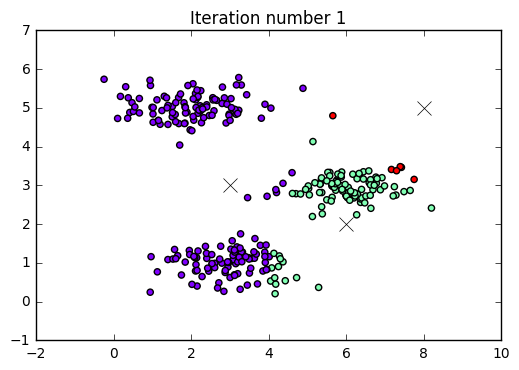

K-Means iteration 2/10


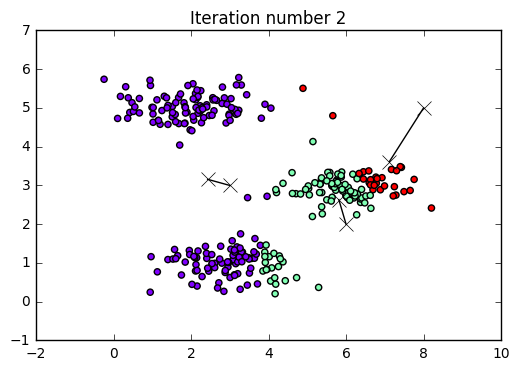

K-Means iteration 3/10


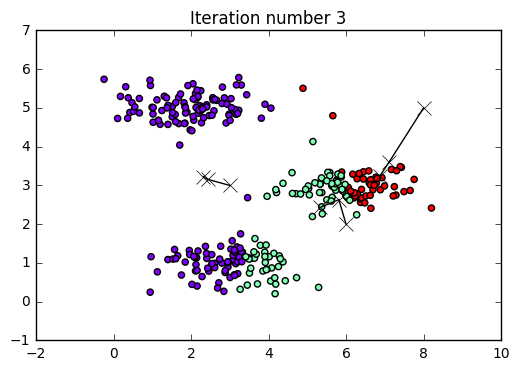

K-Means iteration 4/10


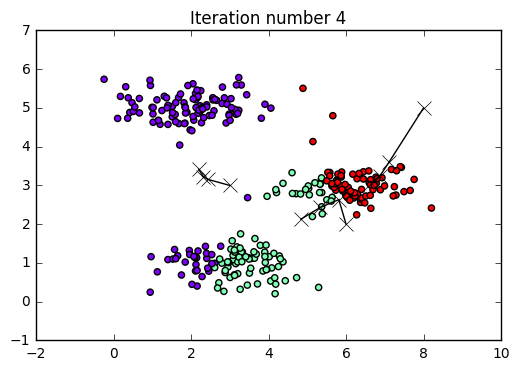

K-Means iteration 5/10


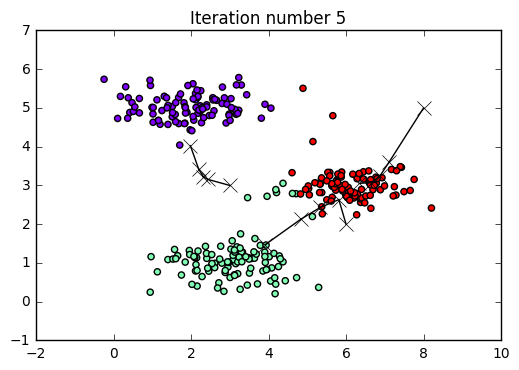

K-Means iteration 6/10


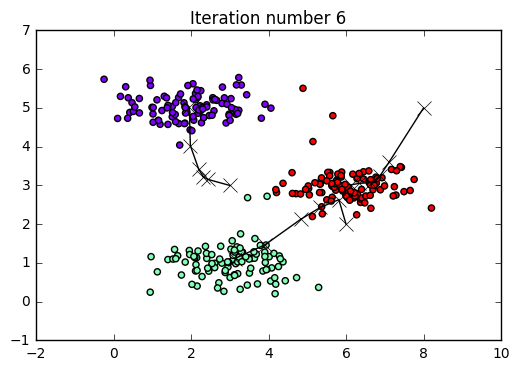

K-Means iteration 7/10


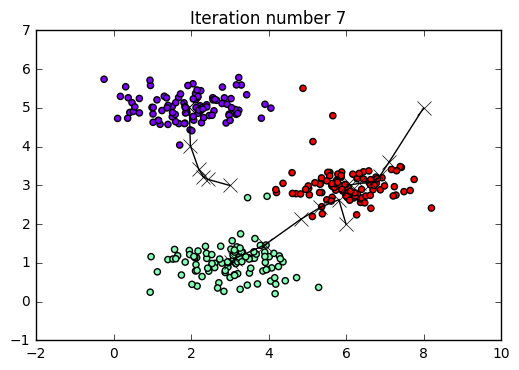

K-Means iteration 8/10


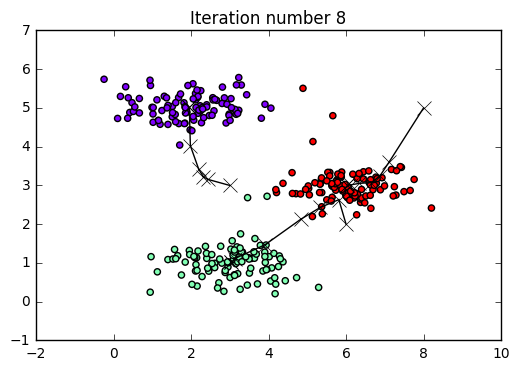

K-Means iteration 9/10


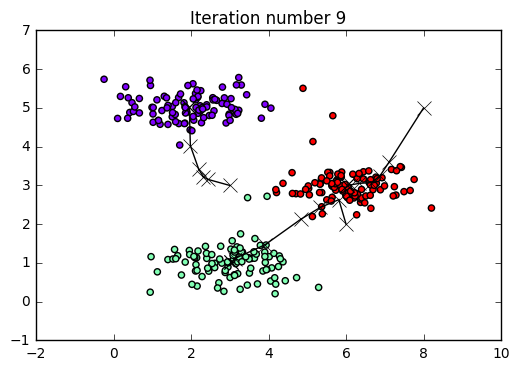

K-Means iteration 10/10


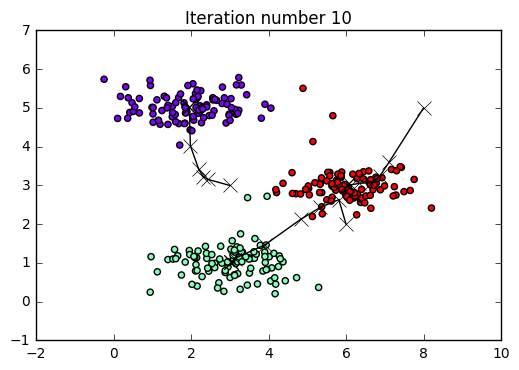

K-Means Done.


In [7]:
# Load an example dataset
mat_data = sio.loadmat('ex7data2.mat')
X = mat_data['X']

# Settings for running K-Means
K = 3
max_iters = 10

# For consistency, here we set centroids to specific values but in practice you want to generate them automatically,
# such as by settings them to be random examples (as can be seen in k_means_init_centroids).
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Run K-Means algorithm
centroids, idx = run_k_means(X, initial_centroids, max_iters, True)
print 'K-Means Done.'

## Part 4: K-Means Clustering on Pixels

The `k_means_init_centroids()` randomly initializes K centroids for K-Means.

In [8]:
def k_means_init_centroids(X, K):
    """
    Initializes K centroids that are to be used in K-Means on the dataset X.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.
    K : int
        The number of centroids.

    Returns
    -------
    centroids : ndarray, shape (K, n_features)
        Randomly initialized centroids, each row of which is the mean of the data points assigned to it.
    """
    rand_idx = np.random.permutation(X.shape[0])
    centroids = X[rand_idx[0:K], :]
    return centroids

Apply K-means on an image with K = 16:

In [9]:
from scipy.misc import imread


# Load an image of a bird
A = imread('bird_small.png')
A = A.astype(float)/255

# Size of the image
img_size = A.shape

# Reshape the image into an Nx3 matrix where N = number of pixels.
X = A.reshape([img_size[0] * img_size[1], img_size[2]])

K = 16
max_iters = 10

# When using K-Means, it is important the initialize the centroids randomly.
initial_centroids = k_means_init_centroids(X, K)

# Run K-Means
centroids, idx = run_k_means(X, initial_centroids, max_iters)

K-Means iteration 1/10
K-Means iteration 2/10
K-Means iteration 3/10
K-Means iteration 4/10
K-Means iteration 5/10
K-Means iteration 6/10
K-Means iteration 7/10
K-Means iteration 8/10
K-Means iteration 9/10
K-Means iteration 10/10


## Part 5: Image Compression

Then we can apply K-means to compress the image. The original images uses 24 bit color. With the 16 centroids we've found in the previous part, we can map the 24 bit color to 16 bit.

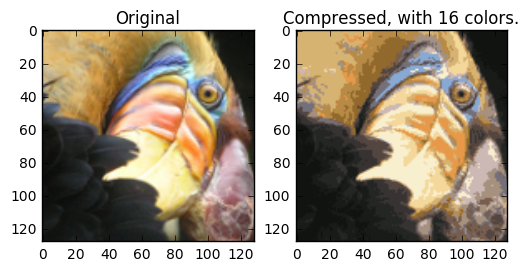

In [10]:
idx = find_closest_centroids(X, centroids)

# Recover the image from the indices (idx) by mapping each pixel (specified by its index in idx) to the centroid value.
X_recovered = centroids[idx.astype(int), :]

# Reshape the recovered image into proper dimensions
X_recovered = X_recovered.reshape(img_size)

fig = plt.figure()
# Display the original image
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(A)
ax1.set_title('Original')
# Display compressed image side by side
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(X_recovered)
ax2.set_title('Compressed, with {} colors.'.format(K))
plt.show()